<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/6_4_Statsmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statsmodel
* statsmodel을 통해서 손쉽게 통계분석을 할 수 있다. 
* https://www.statsmodels.org/stable/index.html

* mpg 파일을 통해 연비에 영향을 미치는 요소를 살펴보자
* https://www.kaggle.com/uciml/autompg-dataset

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
mpg = sns.load_dataset('mpg')

In [ ]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


* regression 함수를 가져온다

In [ ]:
import statsmodels.formula.api as smf

# mpg와 horsepower의 관계를 살펴보자
lm = smf.ols(formula='mpg ~ horsepower', data=mpg).fit()  #y=a + b1*x1을 y~x1 식으로 적으면 됨
lm.summary() # 기본적인 통계치 출력

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        11:32:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* horsepower가 150인 차량의 mpg는 얼마로 예측될까?

In [ ]:
lm.predict({'horsepower':150})

0    16.259151
dtype: float64

* 여러 값을 예측하려면 리스트로 값을 넣어준다

In [ ]:
lm.predict({'horsepower':[150,160,170]})

0    16.259151
1    14.680704
2    13.102256
dtype: float64

### multi-variate regression
* ols 함수 안의 식에 여러가지 변수값을 넣어주기만 하면된다

In [ ]:
# mpg와 horsepower, weight, cylinders,의 관계를 살펴보자
lm2 = smf.ols(formula='mpg ~ horsepower + weight + cylinders', data=mpg).fit()  #y=a+ b1*x1+b2*x2+b3*x3+...을 y~x1+x2+x3+... 식으로 적으면 됨
lm2.summary() # 기본적인 통계치 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     313.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          3.22e-103
Time:                        11:35:39   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     388   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7368      0.796     57.461      0.000      44.172      47.302
horsepower    -0.0427      0.012     -3.677      0.000      -0.066      -0.020
weight        -0.0053      0.001     -8.208      0.000      -0.007      -0.004
cylinders     -0.3890      0.299     -1.302      0.194      -0.977       0.199
==============================================================================
Omnibus:                       37.624   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.959
Skew:                           0.697   Prob(JB):                     8.60e-12
Kurtosis:                       4.085   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm2.predict({'horsepower':[150,160,170], 'weight':[2500,2600,2700], 'cylinders':[4,6,8]})

0    24.591016
1    22.858560
2    21.126104
dtype: float64

# Seaborn
matplotlib에 기반한 그래픽 패키지이며, 깔끔한 디자인과 쉬운 문법을 제공한다

https://seaborn.pydata.org/index.html

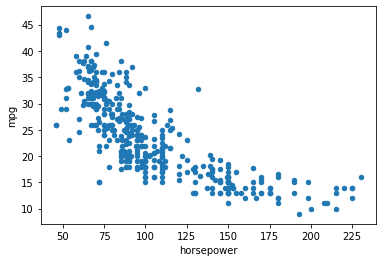

In [ ]:
# horsepower와 mpg의 관계를 scatter plot으로 그려보자

# 1. pandas plot
mpg.plot.scatter(x='horsepower', y='mpg')

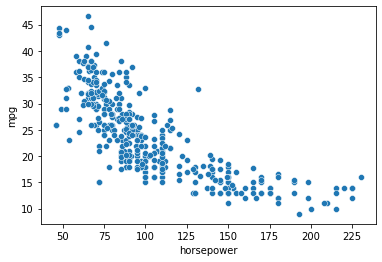

In [ ]:
# 2. seaborn
sns.scatterplot(x='horsepower', y='mpg', data=mpg)

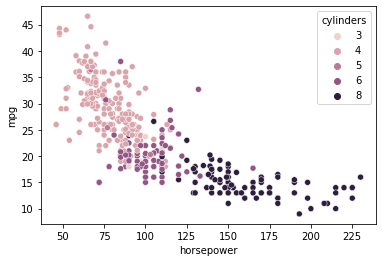

In [ ]:
# cylinder에 따라 색상을 다르게 표현해보자
sns.scatterplot(x='horsepower', y='mpg',hue = 'cylinders', data=mpg)

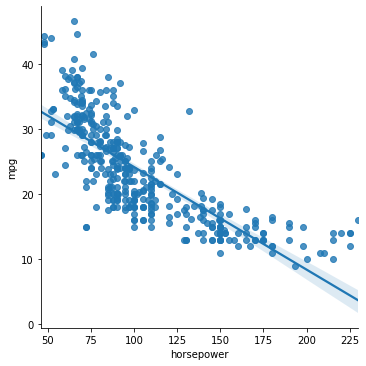

In [ ]:
sns.lmplot(x='horsepower', y='mpg', data=mpg)

In [ ]:
mpg2 = mpg.filter(['mpg', 'cylinders', 'weight', 'horsepower'])

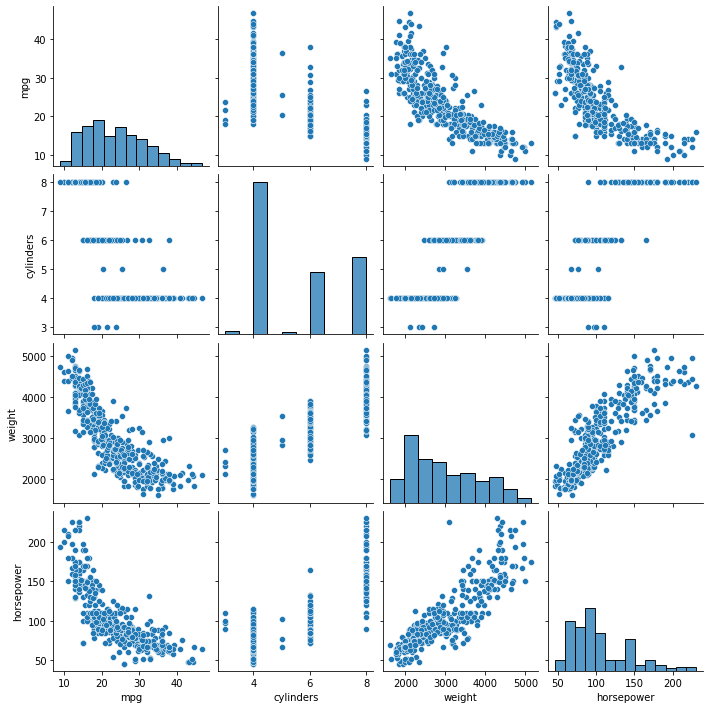

In [ ]:
sns.pairplot(mpg2)